In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Price_euros_train.csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1108 non-null   int64  
 1   Company           1108 non-null   object 
 2   Product           1108 non-null   object 
 3   TypeName          1108 non-null   object 
 4   Inches            1108 non-null   float64
 5   ScreenResolution  1097 non-null   object 
 6   Cpu               1108 non-null   object 
 7   Ram               1108 non-null   object 
 8   Memory            1108 non-null   object 
 9   Gpu               1108 non-null   object 
 10  OpSys             1055 non-null   object 
 11  Weight            1086 non-null   object 
 12  Price_euros       1108 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.7+ KB


### Сначала избавимся от пропусков

In [4]:
# посмотрим процент пропущенных значений
df_nan = df.loc[:, df.isnull().any()]   
df_nan.isnull().sum() / len(df_nan) * 100

ScreenResolution    0.992780
OpSys               4.783394
Weight              1.985560
dtype: float64

In [5]:
df["ScreenResolution"].mode()[0]

'Full HD 1920x1080'

In [6]:
df["ScreenResolution"].fillna(df["ScreenResolution"].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15404\3888191246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ScreenResolution"].fillna(df["ScreenResolution"].mode()[0], inplace=True)


In [7]:
df["OpSys"].mode()[0]

'Windows 10'

In [8]:
df["OpSys"].fillna(df["OpSys"].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15404\3221153458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OpSys"].fillna(df["OpSys"].mode()[0], inplace=True)


In [9]:
df["Weight"].mode()[0]

'2.2kg'

In [10]:
df["Weight"].fillna(df["Weight"].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15404\20059657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].fillna(df["Weight"].mode()[0], inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1108 non-null   int64  
 1   Company           1108 non-null   object 
 2   Product           1108 non-null   object 
 3   TypeName          1108 non-null   object 
 4   Inches            1108 non-null   float64
 5   ScreenResolution  1108 non-null   object 
 6   Cpu               1108 non-null   object 
 7   Ram               1108 non-null   object 
 8   Memory            1108 non-null   object 
 9   Gpu               1108 non-null   object 
 10  OpSys             1108 non-null   object 
 11  Weight            1108 non-null   object 
 12  Price_euros       1108 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 112.7+ KB


### Теперь почистим все числовые столбцы и приведем их к int

In [12]:
df['Memory'].value_counts()

Memory
256GB SSD                        344
1TB HDD                          187
500GB HDD                        118
512GB SSD                        100
128GB SSD +  1TB HDD              81
256GB SSD +  1TB HDD              66
128GB SSD                         64
32GB Flash Storage                34
2TB HDD                           14
64GB Flash Storage                12
1TB SSD                           11
512GB SSD +  1TB HDD              11
256GB SSD +  2TB HDD               9
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           5
256GB Flash Storage                5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
180GB SSD                          3
128GB SSD +  2TB HDD               2
16GB SSD                           2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
64GB SSD                       

сначала заменим все суммы на их значения

In [13]:
df['Memory'].replace({'64GB Flash Storage +  1TB HDD': '1088', 
                      '128GB SSD +  1TB HDD': '1152', '256GB SSD +  1TB HDD': '1280', 
                      '512GB SSD +  1TB HDD': '1536', '256GB SSD +  2TB HDD' : '2304',
                      '512GB SSD +  2TB HDD' : '2560', '128GB SSD +  2TB HDD' : '2176', 
                      '256GB SSD +  256GB SSD' : '512', '256GB SSD +  500GB HDD' : '756', 
                      '1TB SSD +  1TB HDD' : '2048', '1TB HDD +  1TB HDD' : '2048', 
                      '512GB SSD +  512GB SSD' : '1024', '256GB SSD +  1.0TB Hybrid' : '1280' }, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15404\3399415824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Memory'].replace({'64GB Flash Storage +  1TB HDD': '1088', '128GB SSD +  1TB HDD': '1152', '256GB SSD +  1TB HDD': '1280', '512GB SSD +  1TB HDD': '1536', '256GB SSD +  2TB HDD' : '2304', '512GB SSD +  2TB HDD' : '2560', '128GB SSD +  2TB HDD' : '2176', '256GB SSD +  256GB SSD' : '512', '256GB SSD +  500GB HDD' : '756', '1TB SSD +  1TB HDD' : '2048', '1TB HDD +  1TB HDD' : '2048', '512GB SSD +  512GB SSD' : '1024

In [14]:
df['Memory'].value_counts()

Memory
256GB SSD              344
1TB HDD                187
500GB HDD              118
512GB SSD              100
1152                    81
1280                    67
128GB SSD               64
32GB Flash Storage      34
2TB HDD                 14
64GB Flash Storage      12
1TB SSD                 11
1536                    11
2304                     9
16GB Flash Storage       7
1.0TB Hybrid             7
32GB SSD                 5
256GB Flash Storage      5
128GB Flash Storage      4
180GB SSD                3
2560                     3
2048                     3
2176                     2
16GB SSD                 2
512                      2
756                      2
512GB Flash Storage      2
128GB HDD                1
508GB Hybrid             1
8GB SSD                  1
240GB SSD                1
64GB SSD                 1
32GB HDD                 1
1088                     1
1024                     1
1.0TB HDD                1
Name: count, dtype: int64

а теперь заменим все терабайты на мегабайты

In [15]:
df['Memory'].replace({'1TB HDD' : '1024', '2TB HDD' : '2048', '1TB SSD' : '1024', '1.0TB Hybrid' : '1024', '1.0TB HDD' : '1024'}, inplace = True)

In [16]:
df['Memory'].value_counts()

Memory
256GB SSD              344
1024                   207
500GB HDD              118
512GB SSD              100
1152                    81
1280                    67
128GB SSD               64
32GB Flash Storage      34
2048                    17
64GB Flash Storage      12
1536                    11
2304                     9
16GB Flash Storage       7
32GB SSD                 5
256GB Flash Storage      5
128GB Flash Storage      4
2560                     3
180GB SSD                3
756                      2
2176                     2
16GB SSD                 2
512                      2
512GB Flash Storage      2
128GB HDD                1
8GB SSD                  1
240GB SSD                1
64GB SSD                 1
32GB HDD                 1
1088                     1
508GB Hybrid             1
Name: count, dtype: int64

In [17]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                440
1366x768                                         241
IPS Panel Full HD 1920x1080                      191
IPS Panel Full HD / Touchscreen 1920x1080         46
Full HD / Touchscreen 1920x1080                   36
1600x900                                          19
Quad HD+ / Touchscreen 3200x1800                  15
Touchscreen 1366x768                              12
IPS Panel 4K Ultra HD 3840x2160                    9
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              6
IPS Panel 1366x768                                 6
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2304x1440                 5
IPS Panel Retina Display 2560x1600                 5
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x12

In [18]:
#разделим столбец с разрешением на ширину и длину
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand = True)
df['Width'] = df['Width'].astype(int)
df['Height'] = df['Height'].astype(int)

In [19]:
df['Weight'].value_counts()

Weight
2.2kg     127
2.1kg      51
2.4kg      37
2.3kg      32
2kg        30
         ... 
1.14kg      1
3.8kg       1
3.31kg      1
1.19kg      1
4.0kg       1
Name: count, Length: 171, dtype: int64

In [20]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Width,Height
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,1366,768
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,2880,1800


In [21]:
#очистка столбца ram
df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.extract(r'(\d+)')
df['Ram'] = df['Ram'].astype(int)
#очищаем Memory
df['Memory'] = df['Memory'].astype(str)
df['Memory'] = df['Memory'].str.extract(r'(\d+)')
df['Memory'] = df['Memory'].astype(int)
#очищаем Weight
df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].str.extract(r'([0-9.,]+)')
df['Weight'] = df['Weight'].astype(float)
#разделим столбец с разрешением на ширину и длину
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand = True)
df['Width'] = df['Width'].astype(int)
df['Height'] = df['Height'].astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Width,Height
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500,AMD Radeon R5,Windows 10,2.10,400.00,1366,768
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,2880,1800


In [25]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      241
Intel HD Graphics 520      154
Nvidia GeForce GTX 1050     59
Intel UHD Graphics 620      56
Nvidia GeForce GTX 1060     41
                          ... 
AMD Radeon R5 520            1
AMD Radeon Pro 560           1
AMD Radeon R7                1
Nvidia Quadro M2200          1
ARM Mali T860 MP4            1
Name: count, Length: 106, dtype: int64

### Попробуем еще исследовать текстовые солбцы. 


##### Начнем с OpSys

In [23]:
df['OpSys'].value_counts()

OpSys
Windows 10      917
No OS            55
Linux            53
Windows 7        35
Chrome OS        25
macOS             8
Mac OS X          7
Windows 10 S      6
Android           2
Name: count, dtype: int64

In [24]:
df['OpSys'] = df['OpSys'].astype(str)
df['OpSys'] = df['OpSys'].str.replace(' ', '')
df['OpSys'].value_counts()

OpSys
Windows10     917
NoOS           55
Linux          53
Windows7       35
ChromeOS       25
macOS           8
MacOSX          7
Windows10S      6
Android         2
Name: count, dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer()# max_features=20)

vectorizer.fit(df['OpSys'])

train_texts = vectorizer.transform(df['OpSys'])

opsys_train = pd.DataFrame(data = train_texts.toarray(), columns=vectorizer.get_feature_names_out())
opsys_train

,android,chromeos,linux,macos,macosx,noos,windows10,windows10s,windows7
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1103,0,0,0,0,0,0,1,0,0
1104,0,0,0,0,0,0,1,0,0
1105,0,0,0,0,0,0,1,0,0
1106,0,0,0,0,0,0,1,0,0


In [27]:
xtrain = df.drop(['laptop_ID', 'Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys', 'Price_euros' ], axis=1)
Ytrain = df['Price_euros']

In [28]:
xtrain

,Inches,Ram,Memory,Weight,Width,Height
0,13.3,8,128,1.34,1440,900
1,15.4,16,512,1.83,2880,1800
2,13.3,8,256,1.37,2560,1600
3,15.6,4,500,2.10,1366,768
4,15.4,16,256,2.04,2880,1800
...,...,...,...,...,...,...
1103,15.6,4,500,2.20,1366,768
1104,14.0,4,128,1.80,1920,1080
1105,14.0,2,64,1.50,1366,768
1106,15.6,6,1024,2.19,1366,768


In [29]:
Ytrain

0        898.94
1       2537.45
2       1803.60
3        400.00
4       2139.97
         ...   
1103     720.32
1104     638.00
1105     229.00
1106     764.00
1107     369.00
Name: Price_euros, Length: 1108, dtype: float64

ну и тепепь объединим получившиеся таблички))

In [30]:
Xtrain = pd.concat([xtrain, opsys_train], axis = 1)
Xtrain.head()

,Inches,Ram,Memory,Weight,Width,Height,android,chromeos,linux,macos,macosx,noos,windows10,windows10s,windows7
0,13.3,8,128,1.34,1440,900,0,0,0,1,0,0,0,0,0
1,15.4,16,512,1.83,2880,1800,0,0,0,1,0,0,0,0,0
2,13.3,8,256,1.37,2560,1600,0,0,0,1,0,0,0,0,0
3,15.6,4,500,2.10,1366,768,0,0,0,0,0,0,1,0,0
4,15.4,16,256,2.04,2880,1800,0,0,0,0,1,0,0,0,0


<Axes: >

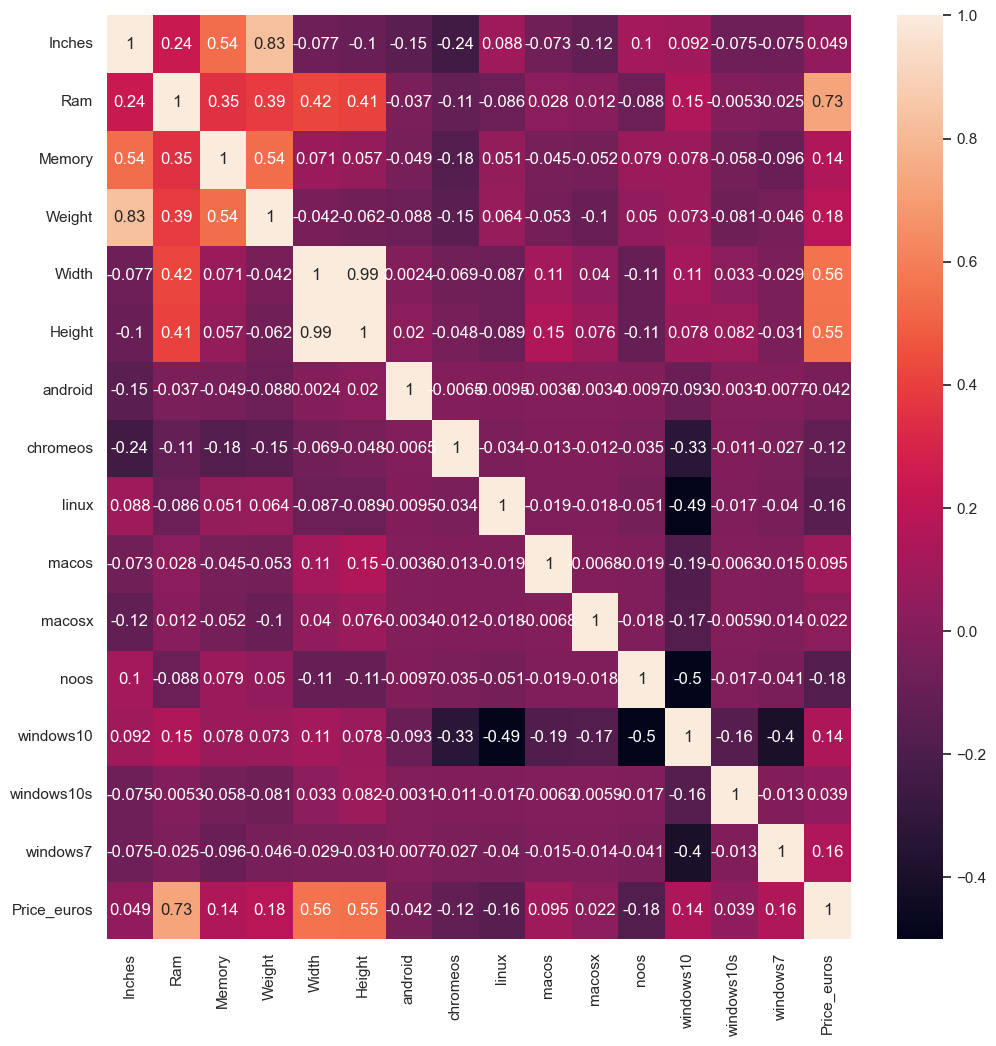

In [56]:
import seaborn as sns
corr = pd.concat([Xtrain, Ytrain], axis = 1).corr()
sns.set_theme(rc={'figure.figsize':(12,12)})
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

##### Другой вариант обработки 
Рассмотрим столбец 

### Теперь обрабатываем так же тестовые данные

In [32]:
df_test = df = pd.read_csv('Price_euros_test.csv')
df_test.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg


In [33]:
# посмотрим процент пропущенных значений
df_test_nan = df_test.loc[:, df_test.isnull().any()]   
df_test_nan.isnull().sum() / len(df_test_nan) * 100

ScreenResolution    1.025641
OpSys               6.153846
Weight              2.051282
dtype: float64

In [34]:
df_test["ScreenResolution"].fillna(df_test["ScreenResolution"].mode()[0], inplace=True)
df_test["Weight"].fillna(df_test["Weight"].mode()[0], inplace=True)
df_test["OpSys"].fillna(df_test["OpSys"].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9860\1746604816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["ScreenResolution"].fillna(df_test["ScreenResolution"].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9860\1746604816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         195 non-null    int64  
 1   Company           195 non-null    object 
 2   Product           195 non-null    object 
 3   TypeName          195 non-null    object 
 4   Inches            195 non-null    float64
 5   ScreenResolution  195 non-null    object 
 6   Cpu               195 non-null    object 
 7   Ram               195 non-null    object 
 8   Memory            195 non-null    object 
 9   Gpu               195 non-null    object 
 10  OpSys             195 non-null    object 
 11  Weight            195 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 18.4+ KB


In [36]:
df_test['Memory'].value_counts()

Memory
256GB SSD                    68
1TB HDD                      36
512GB SSD                    18
500GB HDD                    14
128GB SSD +  1TB HDD         13
128GB SSD                    12
256GB SSD +  1TB HDD          7
32GB Flash Storage            4
1TB SSD                       3
256GB Flash Storage           3
512GB SSD +  1TB HDD          3
64GB Flash Storage            3
180GB SSD                     2
1.0TB Hybrid                  2
2TB HDD                       2
256GB SSD +  2TB HDD          1
32GB SSD                      1
512GB SSD +  1.0TB Hybrid     1
512GB SSD +  256GB SSD        1
16GB SSD                      1
Name: count, dtype: int64

In [37]:
df_test['Memory'].replace({'128GB SSD +  1TB HDD': '1152', '256GB SSD +  1TB HDD': '1280', '512GB SSD +  1TB HDD': '1536', '256GB SSD +  2TB HDD' : '2304', '512GB SSD +  1.0TB Hybrid' : '1536', '512GB SSD +  256GB SSD' : '768', '1TB HDD' : '1024', '1TB SSD' : '1024', '2TB HDD' : '2048', '1.0TB Hybrid' : '1024' }, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_9860\3066359344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Memory'].replace({'128GB SSD +  1TB HDD': '1152', '256GB SSD +  1TB HDD': '1280', '512GB SSD +  1TB HDD': '1536', '256GB SSD +  2TB HDD' : '2304', '512GB SSD +  1.0TB Hybrid' : '1536', '512GB SSD +  256GB SSD' : '768', '1TB HDD' : '1024', '1TB SSD' : '1024', '2TB HDD' : '2048', '1.0TB Hybrid' : '1024' }, inplace=True)


In [38]:
df_test['Memory'].value_counts()

Memory
256GB SSD              68
1024                   41
512GB SSD              18
500GB HDD              14
1152                   13
128GB SSD              12
1280                    7
32GB Flash Storage      4
1536                    4
64GB Flash Storage      3
256GB Flash Storage     3
2048                    2
180GB SSD               2
768                     1
2304                    1
32GB SSD                1
16GB SSD                1
Name: count, dtype: int64

In [39]:
#очистка столбца ram
df_test['Ram'] = df_test['Ram'].astype(str)
df_test['Ram'] = df_test['Ram'].str.extract(r'(\d+)')
df_test['Ram'] = df_test['Ram'].astype(int)
#очищаем Memory
df_test['Memory'] = df_test['Memory'].astype(str)
df_test['Memory'] = df_test['Memory'].str.extract(r'(\d+)')
df_test['Memory'] = df_test['Memory'].astype(int)
#очищаем Weight
df_test['Weight'] = df_test['Weight'].astype(str)
df_test['Weight'] = df_test['Weight'].str.extract(r'([0-9.,]+)')
df_test['Weight'] = df_test['Weight'].astype(float)
#разделим столбец с разрешением на ширину и длину
df_test[['Width', 'Height']] = df_test['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand = True)
df_test['Width'] = df_test['Width'].astype(int)
df_test['Height'] = df_test['Height'].astype(int)
df_test.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Width,Height
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1024,AMD Radeon R5,Windows 10,2.10,1366,768
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1024,Nvidia GeForce GTX 1060,Windows 10,1.95,1920,1080
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256,Nvidia GeForce 940MX,Windows 10,1.70,1920,1080
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1280,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99,1920,1080
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12,1024,Intel HD Graphics 620,Windows 10,2.25,1366,768


In [40]:
df_test['OpSys'].value_counts()

OpSys
Windows 10      168
Windows 7         8
Linux             7
No OS             5
Chrome OS         2
Windows 10 S      2
macOS             2
Mac OS X          1
Name: count, dtype: int64

In [41]:
df_test['OpSys'] = df_test['OpSys'].astype(str)
df_test['OpSys'] = df_test['OpSys'].str.replace(' ', '')
df_test['OpSys'].value_counts()

OpSys
Windows10     168
Windows7        8
Linux           7
NoOS            5
ChromeOS        2
Windows10S      2
macOS           2
MacOSX          1
Name: count, dtype: int64

In [42]:
vectorizer.fit(df_test['OpSys'])

test_texts = vectorizer.transform(df_test['OpSys'])

opsys_test = pd.DataFrame(data = test_texts.toarray(), columns=vectorizer.get_feature_names_out())
opsys_test.insert(0, 'android', 0)
opsys_test

,android,chromeos,linux,macos,macosx,noos,windows10,windows10s,windows7
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,1,0,0
191,0,0,0,0,0,0,1,0,0
192,0,0,0,0,0,0,1,0,0
193,0,0,0,0,0,0,1,0,0


In [43]:
xtest = df_test.drop(['laptop_ID', 'Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys',  ], axis=1)

In [44]:
xtest

,Inches,Ram,Memory,Weight,Width,Height
0,15.6,4,1024,2.10,1366,768
1,14.0,16,1024,1.95,1920,1080
2,15.6,8,256,1.70,1920,1080
3,17.3,16,1280,2.99,1920,1080
4,15.6,12,1024,2.25,1366,768
...,...,...,...,...,...,...
190,15.6,4,500,2.07,1920,1080
191,15.6,8,1024,2.20,1920,1080
192,13.3,8,256,1.32,1920,1080
193,15.6,16,512,2.09,1920,1080


In [45]:
Xtest = pd.concat([xtest, opsys_test], axis = 1)
Xtest.head()

,Inches,Ram,Memory,Weight,Width,Height,android,chromeos,linux,macos,macosx,noos,windows10,windows10s,windows7
0,15.6,4,1024,2.10,1366,768,0,0,0,0,0,0,1,0,0
1,14.0,16,1024,1.95,1920,1080,0,0,0,0,0,0,1,0,0
2,15.6,8,256,1.70,1920,1080,0,0,0,0,0,0,1,0,0
3,17.3,16,1280,2.99,1920,1080,0,0,0,0,0,0,1,0,0
4,15.6,12,1024,2.25,1366,768,0,0,0,0,0,0,1,0,0


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.3, random_state=1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(775, 15) (775,)
(333, 15) (333,)


### Обучаем модель

In [47]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rand_forest = RandomForestRegressor()
cat_boost = CatBoostRegressor()

rand_forest.fit(X_train, Y_train)
predictions_forest = rand_forest.predict(X_test)

cat_boost.fit(X_train, Y_train, logging_level='Silent')
predictions_cat = cat_boost.predict(X_test)

print('MSE for RandomForest:', mean_squared_error(Y_test, predictions_forest))
print('MSE for CatBoost:',mean_squared_error(Y_test, predictions_cat))

print('MAE for RandomForest:', mean_absolute_error(Y_test, predictions_forest))
print('MAE for CatBoost:',mean_absolute_error(Y_test, predictions_cat))

print('R2 for RandomForest:', r2_score(Y_test, predictions_forest))
print('R2 for CatBoost:',r2_score(Y_test, predictions_cat))

MSE for RandomForest: 176229.17841276585
MSE for CatBoost: 149969.58370805986
MAE for RandomForest: 260.82179640339973
MAE for CatBoost: 255.71724040943238
R2 for RandomForest: 0.5964095428225646
R2 for CatBoost: 0.6565478350600931


In [49]:
# model = LinearRegression()
# model.fit(Xtrain, Ytrain)
# predictions = model.predict(Xtest)

In [50]:
# model = CatBoostRegressor()
# model.fit(Xtrain, Ytrain, logging_level='Silent')
# predictions = model.predict(Xtest)

In [51]:
# result = {"index": df_test.index , "Price_euros": predictions, }
# df_result = pd.DataFrame(result)
# print(df_result)
# df_result.to_csv("results.csv", index=False)